# Classification of Credit Card Default Risk: A Machine Learning Approach

## Name: Ajay A L

### Overview of Problem Statement

In the banking and financial sector, credit risk is a major concern, as it directly impacts the profitability and sustainability of financial institutions. Banks issue credit cards to clients based on their financial standing and repayment capacity, but there is always a risk that clients may fail to pay their dues. This failure to pay (credit default) can result in significant losses for the bank.

The primary challenge is to accurately predict whether a credit card client will default on their payment in the next month based on their demographic details, financial history, and repayment behavior. Early identification of clients at high risk of default can help financial institutions take proactive measures to mitigate losses, such as adjusting credit limits, offering restructuring plans, or rejecting high-risk applications.

## Objectives

Predict Credit Default:
 Build a machine learning model that accurately predicts whether a client will default on their credit card payment in the next month, using demographic, financial, and repayment history data.

Identify Key Factors:
 Analyze and identify the most significant features (e.g., repayment status, credit limit, bill amounts) that influence the likelihood of credit default.

### Data Description

**Source:** From UCI ML Repository, link: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

**Features:** 
* **ID:** Id of the users.
* **LIMIT_BAL:** Amount of given credit.
* **SEX:** Sex of the customer.**(1= Male, 2= Female)**
* **EDUCATION:** Education level of customers **(1 = graduate school; 2 = university; 3 = high school; 4 = others)**
* **MARRIAGE:** Marital status **(1 = married; 2 = single; 3 = others)**
* **AGE:** Age of the customer.nth'

* **PAY_0:** Pay status of september.
* **PAY_2:** Pay status of August.
* **PAY_3:** Pay status of July.
* **PAY_4:** Pay Status of June.
* **PAY_5:** Pay status of May.
* **PAY_6:** Pay status of April.

**PAY_0 to PAY_6 contains values of -2 to 9
describes the status of repayment -2 = no payment; -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.**

* **BILL_AMT1:** Bill Amount of September.
* **BILL_AMT2:** Bill Amount of August.
* **BILL_AMT3:** Bill Amount of July.
* **BILL_AMT4:** Bill Amount of June.
* **BILL_AMT5:** Bill Amount of May.
* **BILL_AMT6:** Bill Amount of April.

* **PAY_AMT1:** Payed Amount in September.
* **PAY_AMT2:** Payed Amount in August.
* **PAY_AMT3:** Payed Amount in July.
* **PAY_AMT4:** Payed Amount in June.
* **PAY_AMT5:** Payed Amount in May.
* **PAY_AMT6:** Payed Amount in April.

* **default payment next month:** User defaulted the payment or not (1=Yes, 0=No). **Target Variable**

In [175]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib 
from sklearn.metrics import roc_auc_score , roc_curve, auc


### Data Collection

**Loading Data**

In [21]:
data = pd.read_csv('default of credit card clients.csv')

**Converting to Dataframe**

In [23]:
df = pd.DataFrame(data)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [24]:
df.head(10) #details of top 10 row

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


**Displaying information**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

**Checking shape of data**

In [28]:
df.shape

(30000, 25)

**Describing the details of the dataset**

In [30]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Displaying columns**

In [32]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

**Checking Datatypes**

In [34]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [35]:
print(df['default payment next month'].dtype)

int64


### Data Cleaning and Preprocessing

**Checking for Duplicates**

In [38]:
df.duplicated() 

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [39]:
df.duplicated().sum()

0

**No duplicate values found in the Dataset**

**Finding and Handling null values**


In [42]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**No Null values found in the dataset**

**Renaming some columns for better understanding**


In [45]:
df = df.rename(columns={
    'PAY_0': 'sept_paystat',
    'PAY_2': 'aug_paystat',
    'PAY_3': 'july_paystat',
    'PAY_4': 'june_paystat',
    'PAY_5': 'may_paystat',
    'PAY_6': 'april_paystat',
    'BILL_AMT1': 'sept_bill',
    'BILL_AMT2': 'aug_bill',
    'BILL_AMT3': 'july_bill',
    'BILL_AMT4': 'june_bill',
    'BILL_AMT5': 'may_bill',
    'BILL_AMT6': 'april_bill',
    'PAY_AMT1': 'sept_payment',
    'PAY_AMT2': 'aug_payment',
    'PAY_AMT3': 'july_payment',
    'PAY_AMT4': 'june_payment',
    'PAY_AMT5': 'may_payment',
    'PAY_AMT6': 'april_payment'
})


In [46]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,sept_paystat,aug_paystat,july_paystat,june_paystat,...,june_bill,may_bill,april_bill,sept_payment,aug_payment,july_payment,june_payment,may_payment,april_payment,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Finding Numerical columns**

In [48]:
numerical_columns = df.select_dtypes(include=['number'])
numerical_columns

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,sept_paystat,aug_paystat,july_paystat,june_paystat,...,june_bill,may_bill,april_bill,sept_payment,aug_payment,july_payment,june_payment,may_payment,april_payment,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [225]:
target_value_count = df['default payment next month'].value_counts() # Counting y variable counts

print(target_value_count)

default payment next month
0    23364
1     6636
Name: count, dtype: int64


**Boxplot for numerical columns**

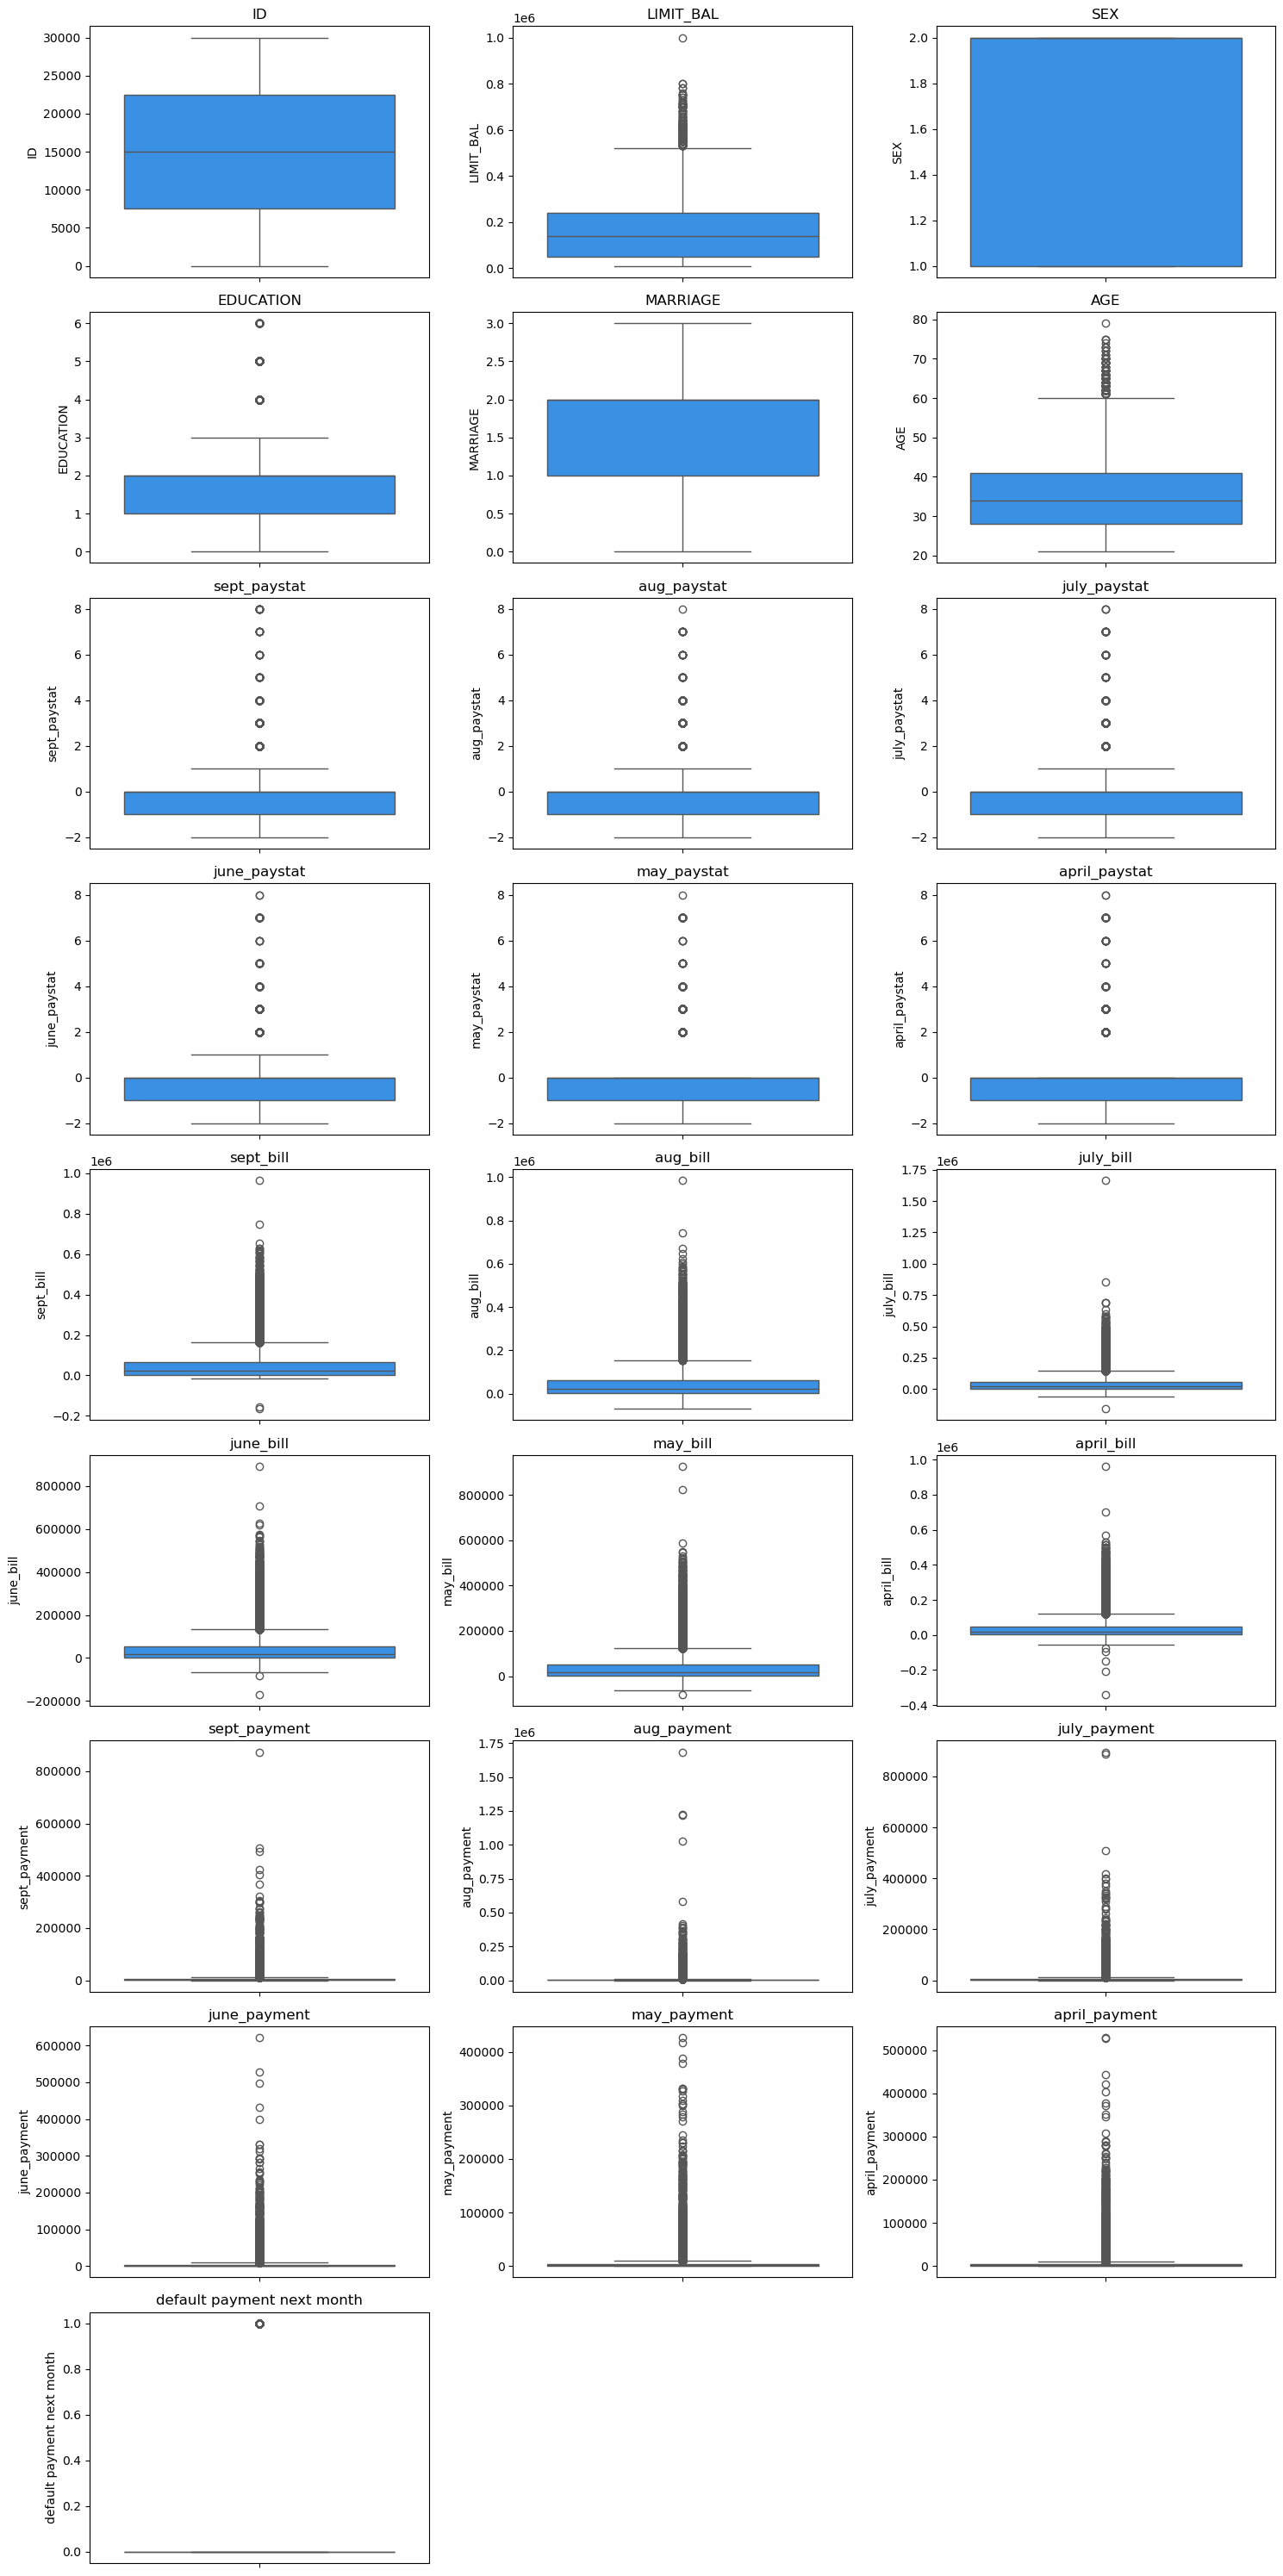

In [50]:
plt.figure(figsize=(15,30))
for i,col in enumerate(numerical_columns):
    plt.subplot(9,3,i+1)
    sns.boxplot(y=df[col], color='dodgerblue')
    plt.title(col)
plt.tight_layout()
plt.show()

* **Since this is a classification model the target feature's outliers can be left unaltered.**
* **The paystat features contain values of predetermined range(-2 to 9)and have categorical behavior so those columns doesnt have true outliers**
* **Features like sex, Education , marriage has ordinal and binary encoded data, so outlier fixing is not a best practice**

**Selecting features which needed outlier fixing**

In [53]:
#Dropping ID column since it is not important
df = df.drop(columns=['ID'])


In [54]:
# These are the features having continues numerical values. (ordinal value having categotical behaviour doesnt have true outliers)
outlier_fix_columns = [
    'LIMIT_BAL', 'AGE', 'sept_bill', 'aug_bill', 'july_bill', 
    'june_bill', 'may_bill', 'april_bill', 'sept_payment', 'aug_payment', 
    'july_payment', 'june_payment', 'may_payment', 'april_payment'
]

**Visualizing outliers using boxplot**


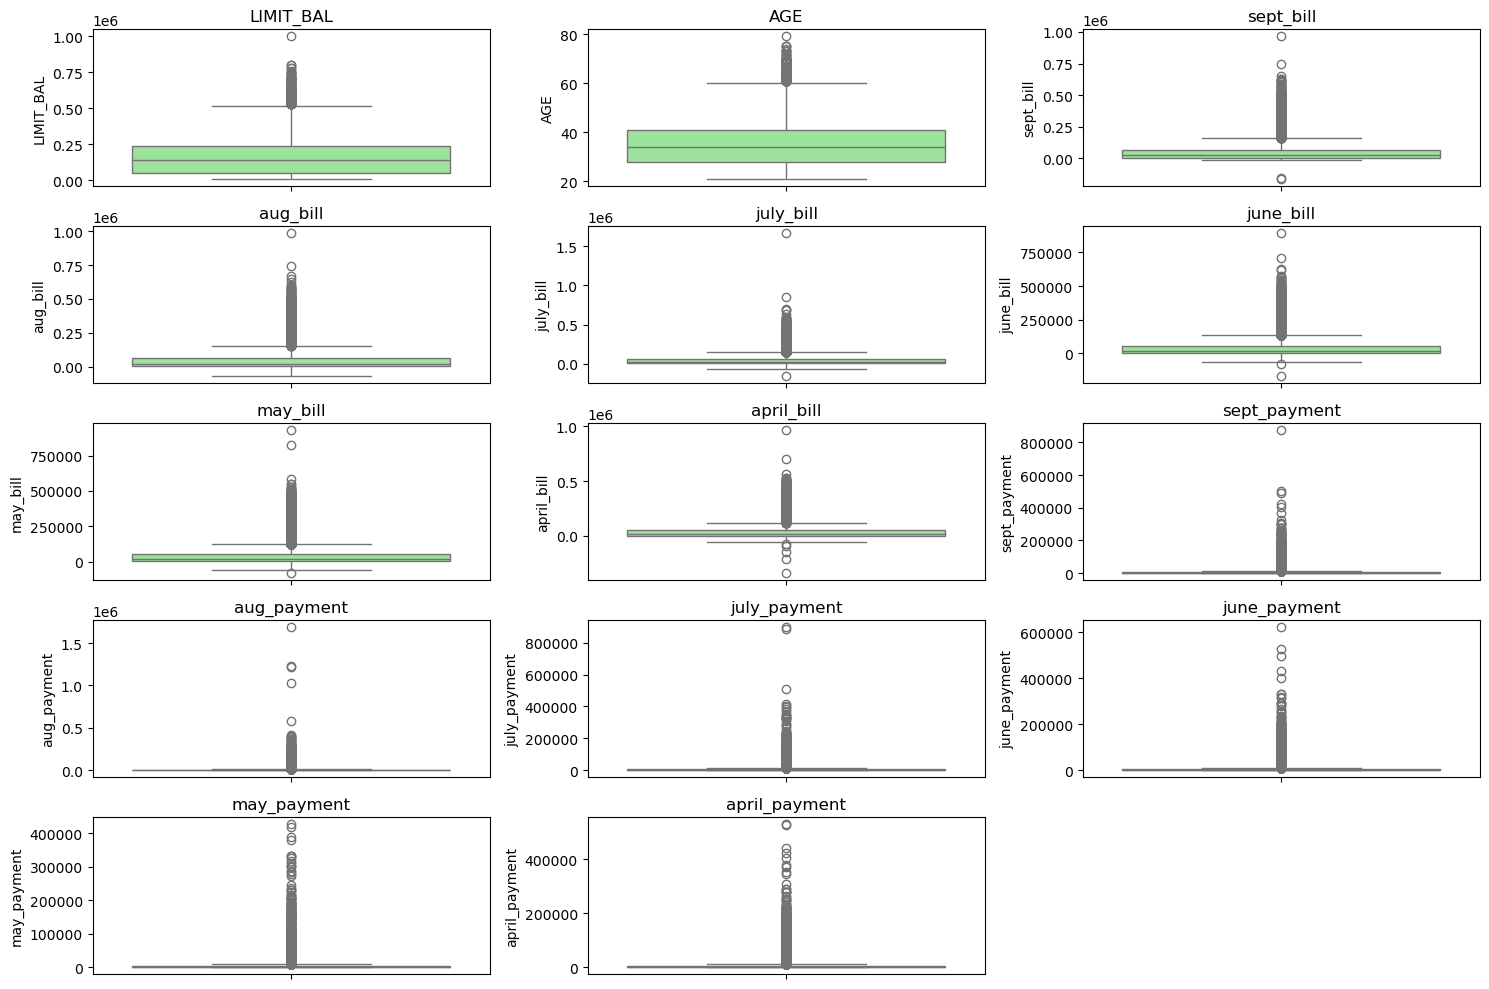

In [56]:
plt.figure(figsize=(15,10))
for i,col in enumerate(outlier_fix_columns):
    plt.subplot(5,3,i+1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

**Fixing Outliers using the IQR method**


In [58]:
for column in outlier_fix_columns:
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                   # Interquartile range
    lower_bound = Q1 - 1.5 * IQR    # Lower whisker
    upper_bound = Q3 + 1.5 * IQR    # Upper whisker
    
    # Capping outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

**Visualizing after fixing outliers using IQR**

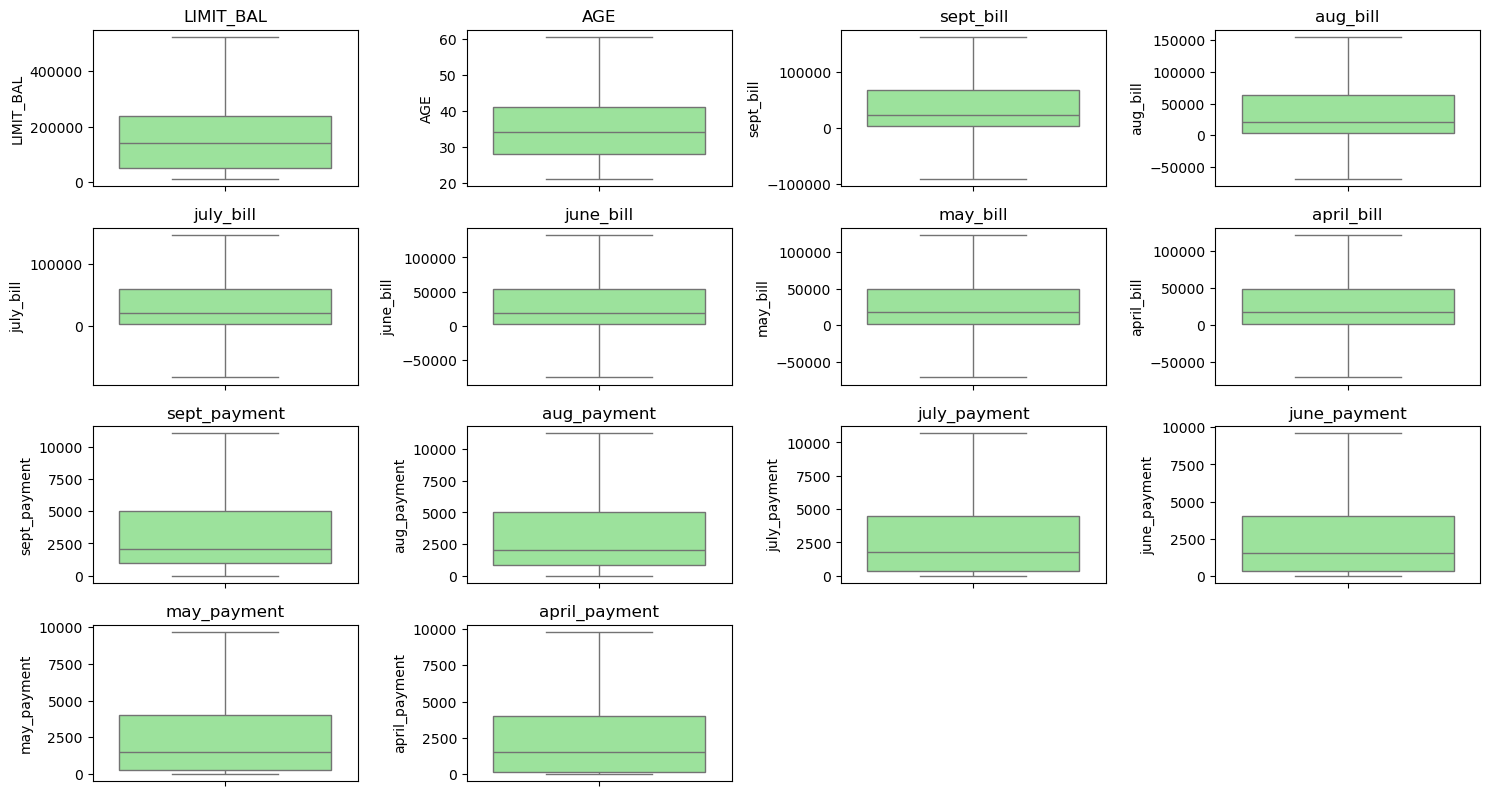

In [60]:
plt.figure(figsize=(15,10))
for i,col in enumerate(outlier_fix_columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

Features that needed Outlier Fixing has been handled Using IQR method

**Checking skewness of the data**

In [63]:
df[outlier_fix_columns].skew()

LIMIT_BAL        0.904504
AGE              0.654467
sept_bill        1.194178
aug_bill         1.189649
july_bill        1.184730
june_bill        1.183997
may_bill         1.184657
april_bill       1.199718
sept_payment     1.032414
aug_payment      1.113399
july_payment     1.200528
june_payment     1.176348
may_payment      1.183906
april_payment    1.211015
dtype: float64

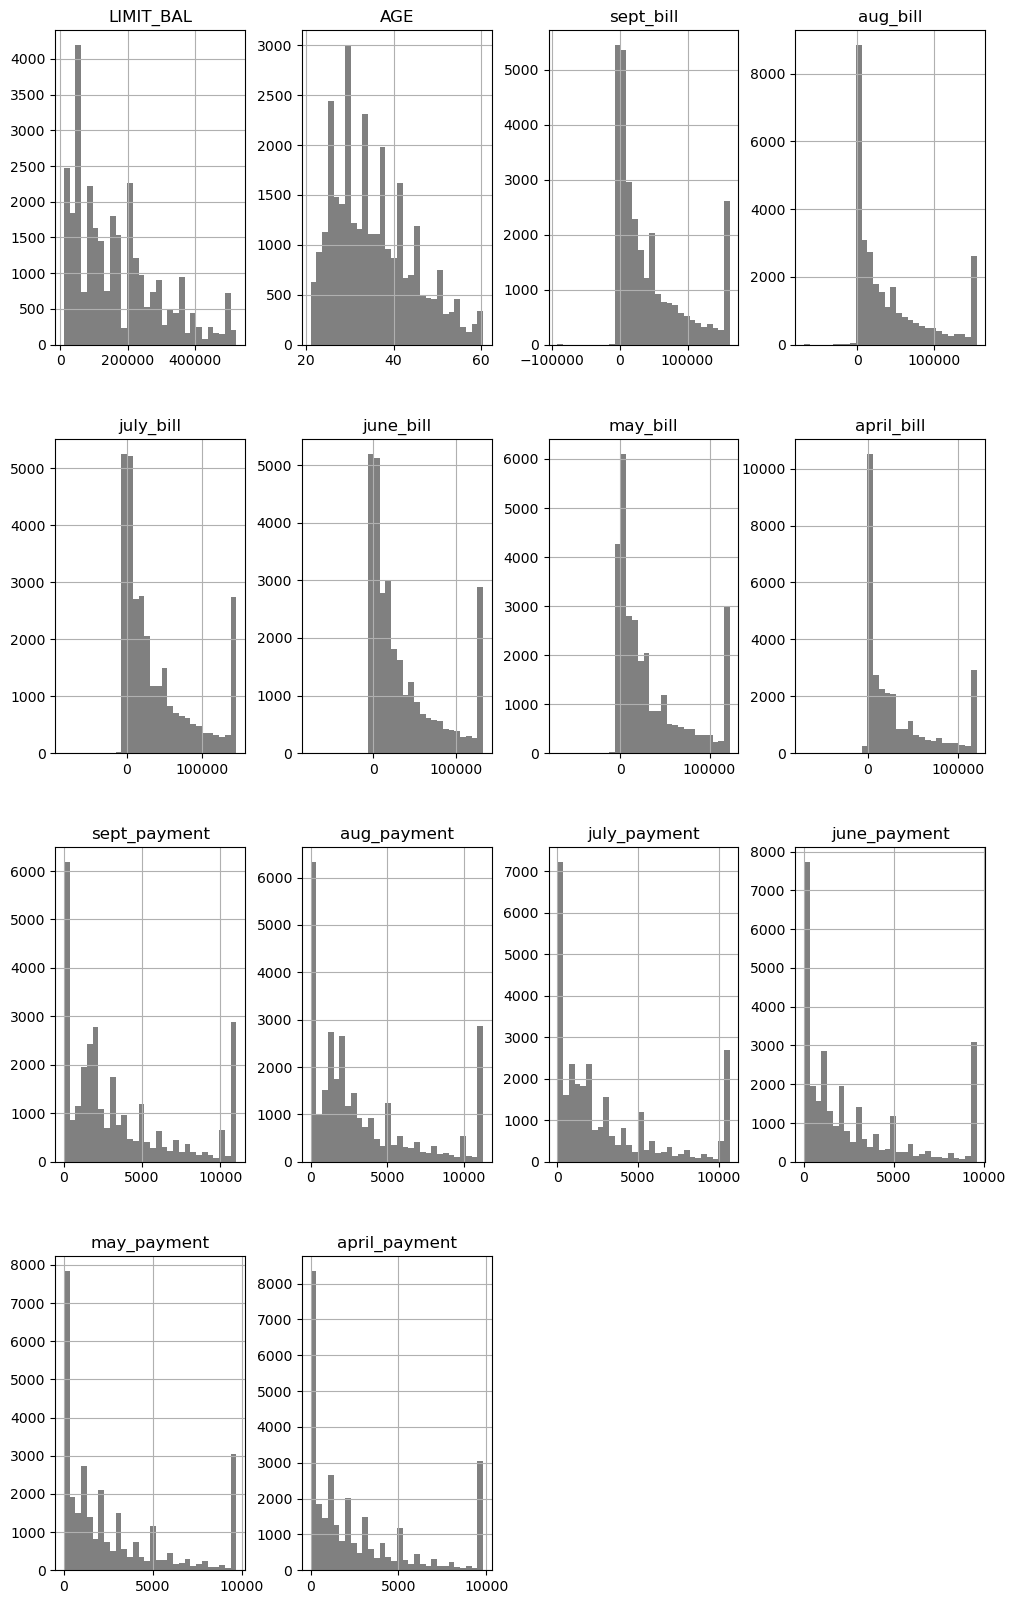

In [64]:
# Plot histograms before transformed features
df[outlier_fix_columns].hist(figsize=(12, 20), bins=30,color='grey')
plt.show()

**Applying square root transformation to fix skewness of needed features**


In [66]:

df[outlier_fix_columns] = np.sqrt(np.abs(df[outlier_fix_columns]) + 1)


In [67]:
print(df[outlier_fix_columns].skew())

LIMIT_BAL        0.247482
AGE              0.436065
sept_bill        0.437944
aug_bill         0.422110
july_bill        0.415432
june_bill        0.418846
may_bill         0.427006
april_bill       0.448018
sept_payment     0.095435
aug_payment      0.163805
july_payment     0.285515
june_payment     0.313511
may_payment      0.308738
april_payment    0.332968
dtype: float64


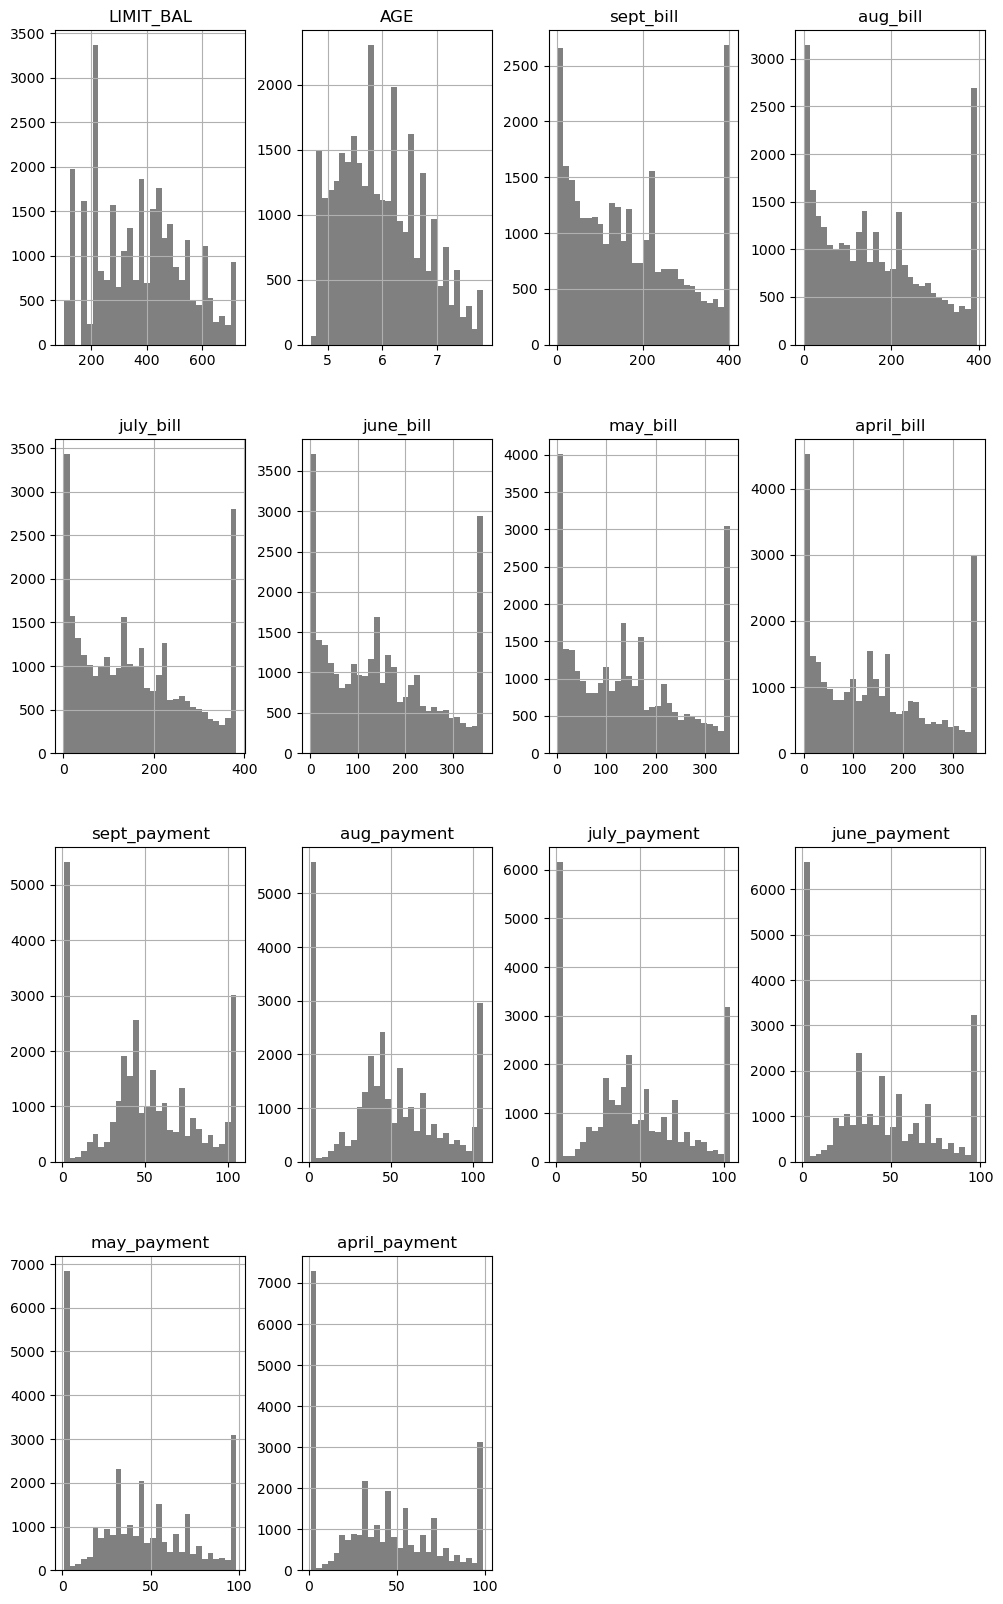

In [68]:
# Plot histograms After transformed features

df[outlier_fix_columns].hist(figsize=(12, 20), bins=30,color='grey')
plt.show()

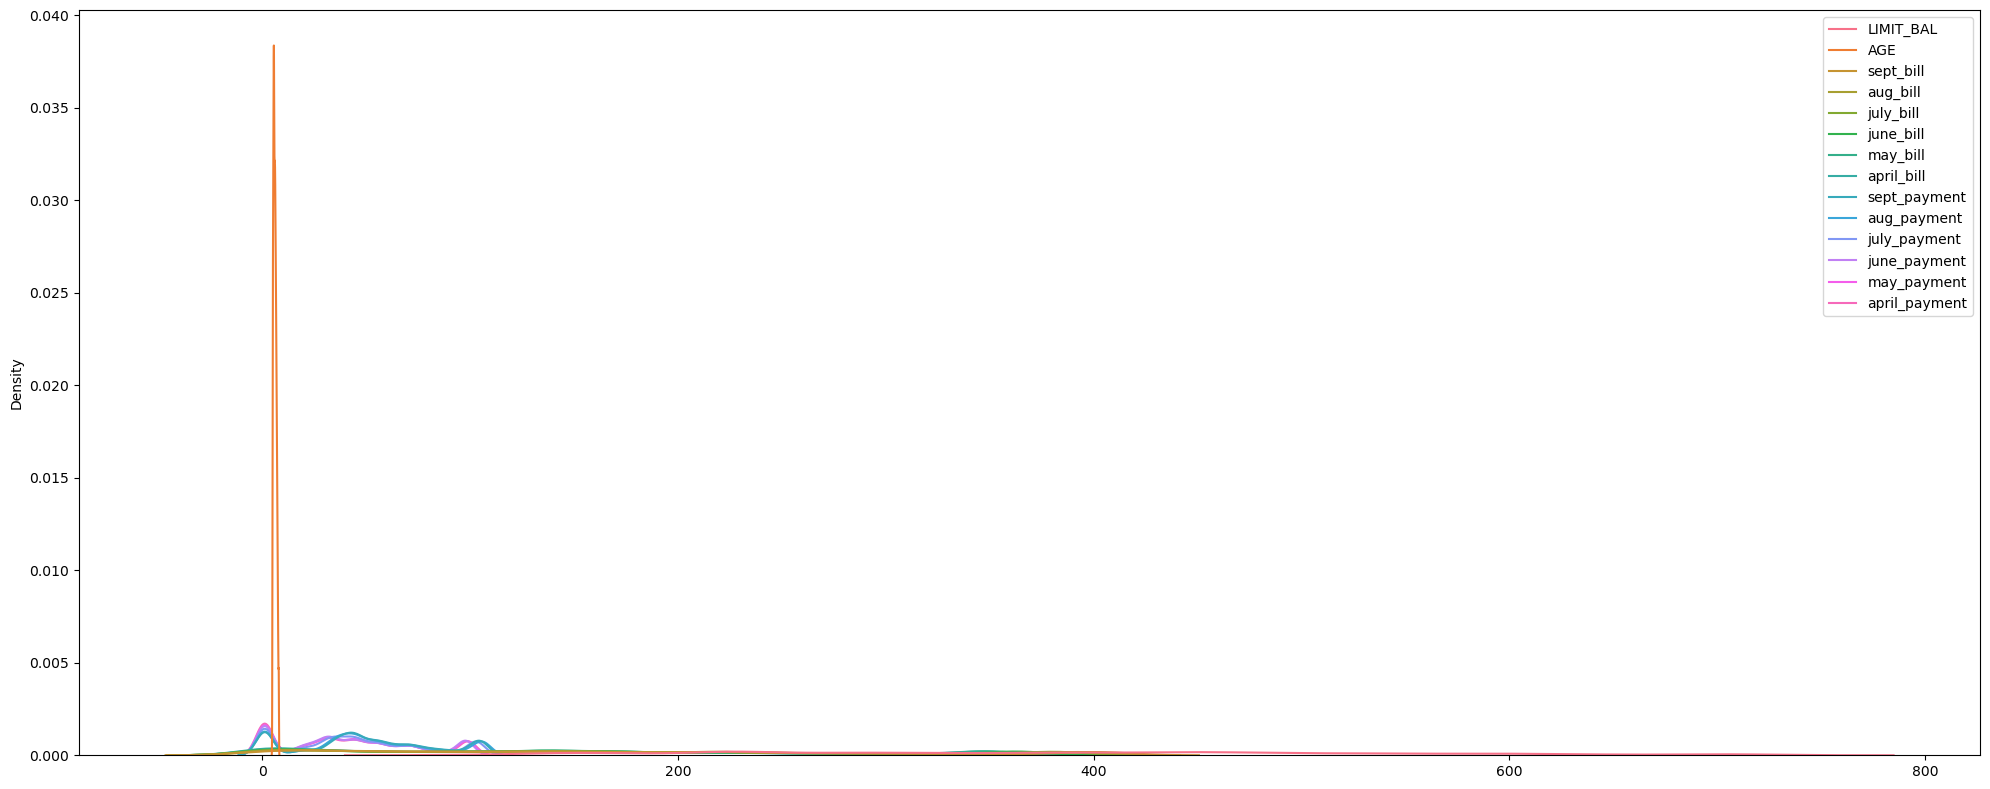

In [69]:
# Drawing KDE plot
plt.figure(figsize=(20,8))
sns.kdeplot(df[outlier_fix_columns])
plt.tight_layout()
plt.show()

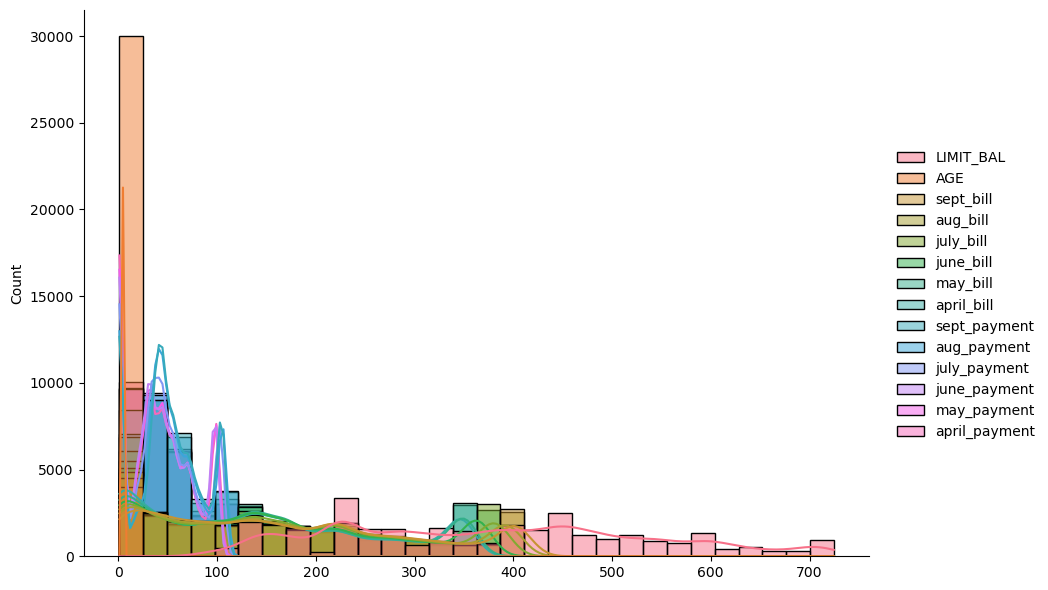

In [70]:
sns.displot(df[outlier_fix_columns], bins=30, kde=True, height=6, aspect=1.5)  # Create the distribution plot


## Exploratory Data Analysis (EDA)

In [73]:
#creating list of columns having continues numbers
continues_num_col =  [
    'LIMIT_BAL', 'AGE', 'sept_bill', 'aug_bill', 'july_bill', 
    'june_bill', 'may_bill', 'april_bill', 'sept_payment', 'aug_payment', 
    'july_payment', 'june_payment', 'may_payment', 'april_payment'
]

In [74]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'sept_paystat',
       'aug_paystat', 'july_paystat', 'june_paystat', 'may_paystat',
       'april_paystat', 'sept_bill', 'aug_bill', 'july_bill', 'june_bill',
       'may_bill', 'april_bill', 'sept_payment', 'aug_payment', 'july_payment',
       'june_payment', 'may_payment', 'april_payment',
       'default payment next month'],
      dtype='object')

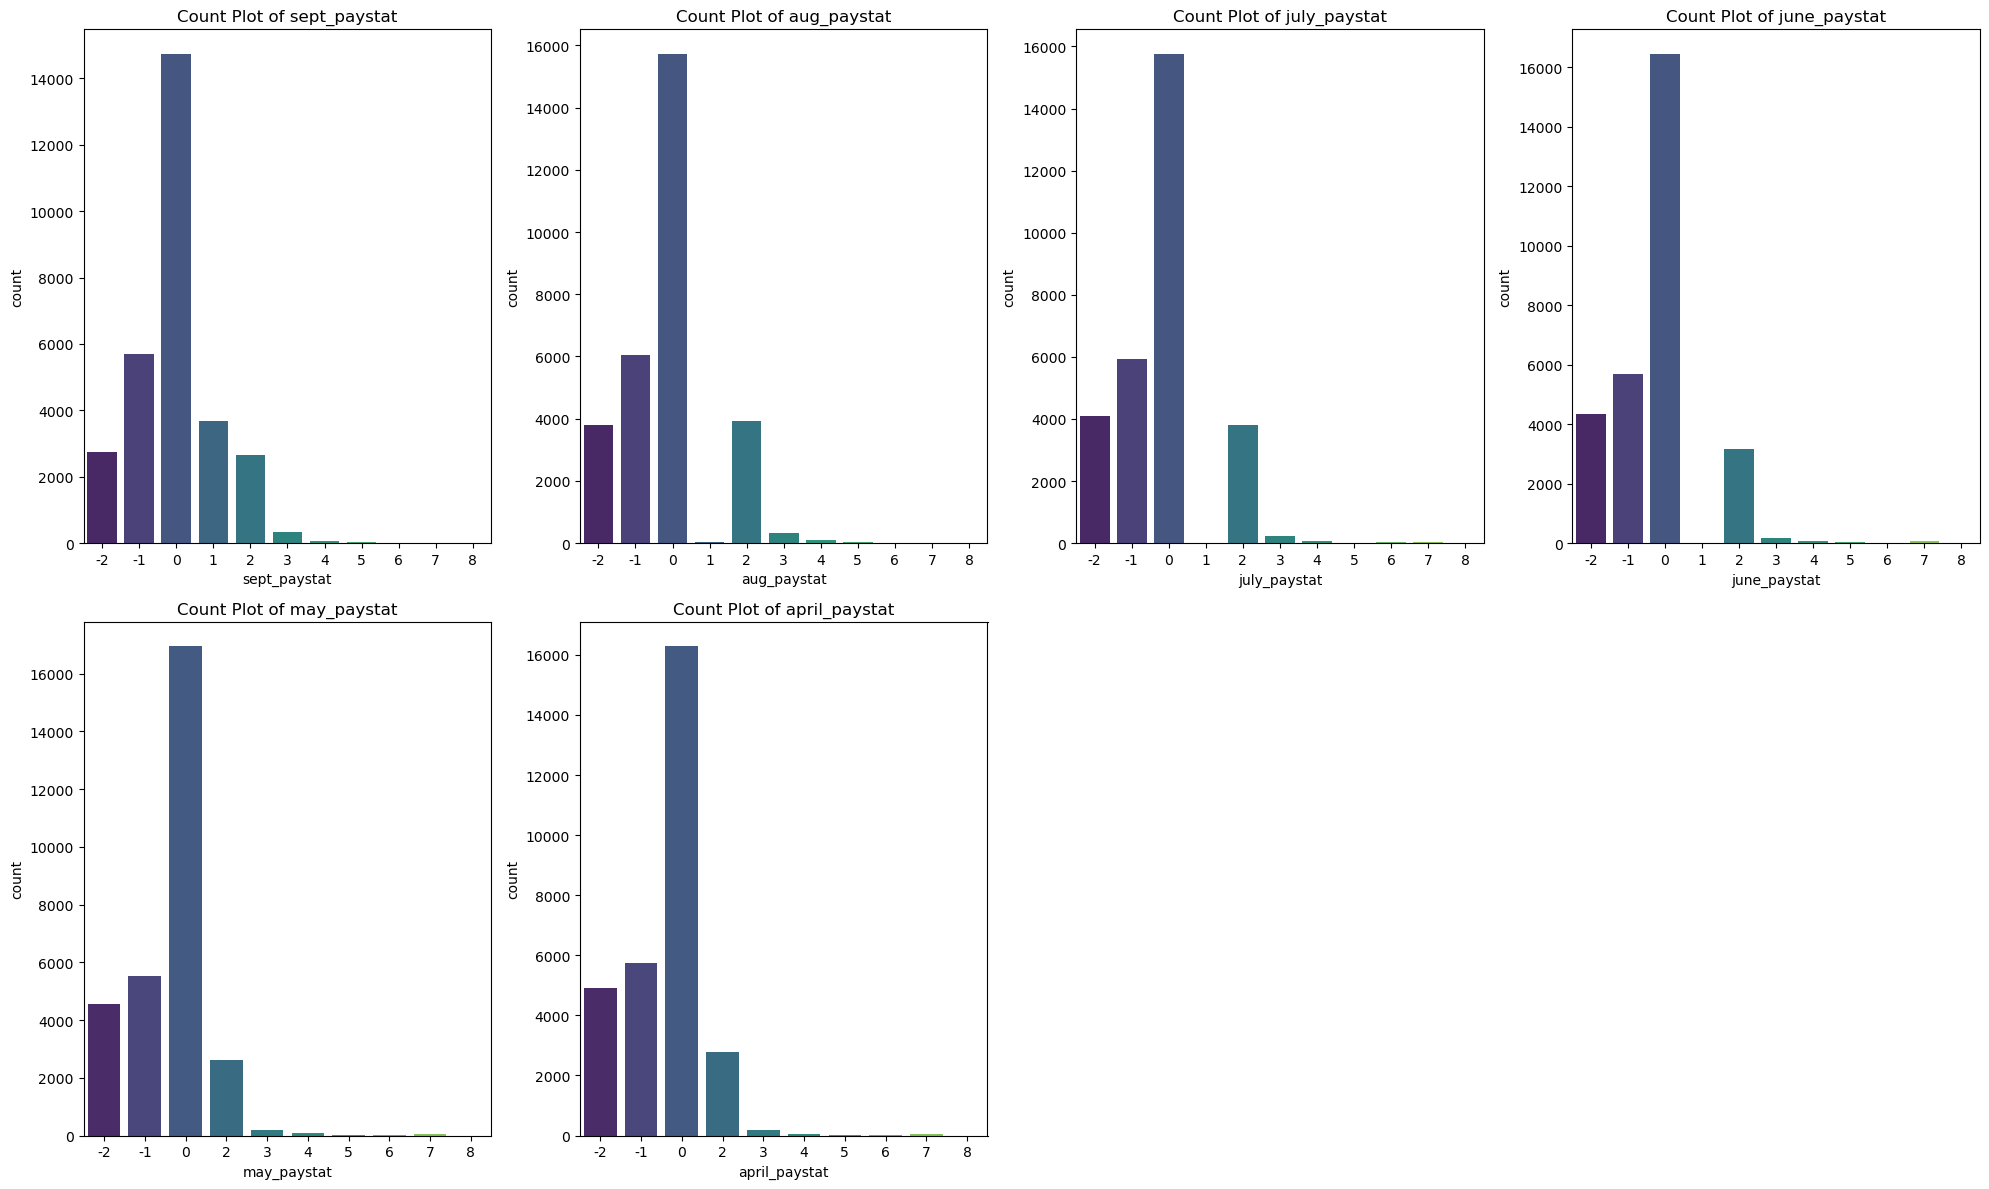

In [75]:
# Count Plot for status of  repayment 

# List of columns to plot
pay_columns = [ 'sept_paystat', 'aug_paystat', 'july_paystat', 'june_paystat', 'may_paystat', 'april_paystat']


# Set the figure size
plt.figure(figsize=(20, 12))

# Loop through each PAY column and create a count plot
for i, column in enumerate(pay_columns):
    plt.subplot(2, 4, i + 1)  # Create a grid of subplots
    sns.countplot(x=df[column], palette="viridis")
    plt.title(f"Count Plot of {column}")

plt.tight_layout()  
plt.show()


***In Above Figure 
-1 = Fully paid
1- 9 means delayed for 1-9 respectevely 
-2 = no payment 
0 = no due***

In [253]:
gender_counts = df['SEX'].value_counts()
print("Counts by Gender:")
print(gender_counts)


Counts by Gender:
SEX
2    18112
1    11888
Name: count, dtype: int64


In [255]:
# Bar plot for Gender count

Counts by Gender:
SEX
2    18112
1    11888
Name: count, dtype: int64


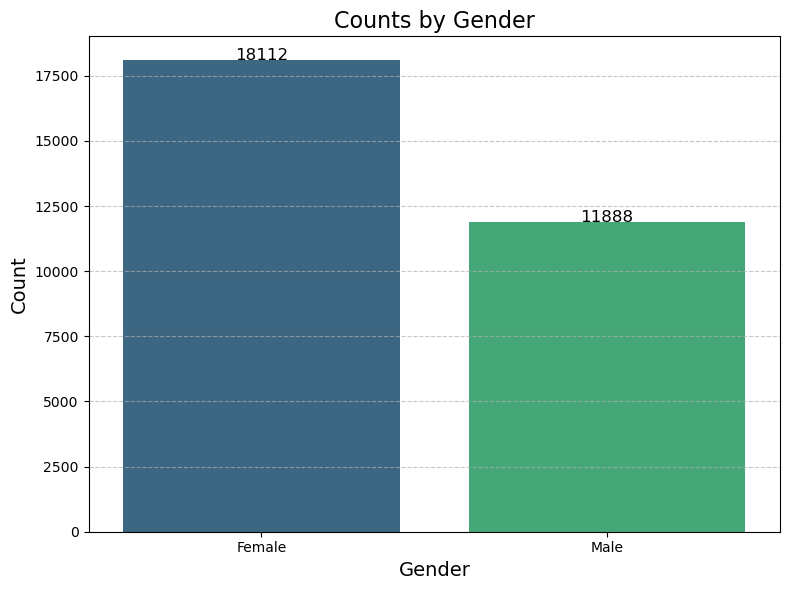

In [263]:
# Calculate counts by gender
gender_counts = df['SEX'].value_counts()
print("Counts by Gender:")
print(gender_counts)

# Define gender labels to ensure proper alignment
gender_mapping = {1: 'Male', 2: 'Female'}  # Adjust based on your dataset
gender_labels = [gender_mapping[idx] for idx in gender_counts.index]

# Plot the counts
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_labels, y=gender_counts.values, palette='viridis')

# Label the bars with counts
for i, count in enumerate(gender_counts.values):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12)  # Add text slightly above the bar

# Customize the plot
plt.title('Counts by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [77]:

# List of BILL and PAY columns to plot
bill_columns = ['sept_bill', 'aug_bill', 'july_bill','june_bill', 'may_bill', 'april_bill']
pay_columns = ['sept_payment', 'aug_payment', 'july_payment', 'june_payment', 'may_payment', 'april_payment']



In [84]:
# Pie chart if bill amount vs pay amount

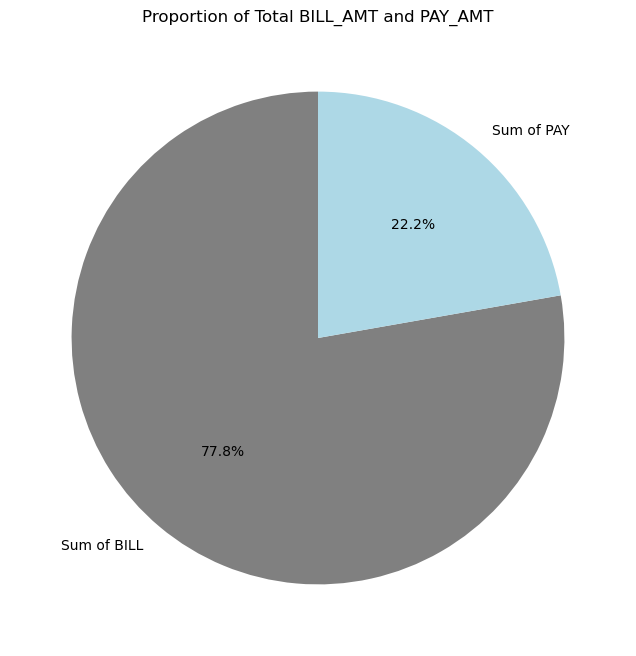

In [85]:
# Calculate the sum of all BILL_AMT and PAY_AMT columns
bill_amt_sum = df[bill_columns].sum().sum()  # Sum of all BILL_AMT columns
pay_amt_sum = df[pay_columns].sum().sum()  # Sum of all PAY_AMT columns

# Create a pie chart to show the proportion of each sum
labels = ['Sum of BILL', 'Sum of PAY']
sizes = [bill_amt_sum, pay_amt_sum]
colors = ['grey', 'lightblue']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proportion of Total BILL_AMT and PAY_AMT")
plt.show()

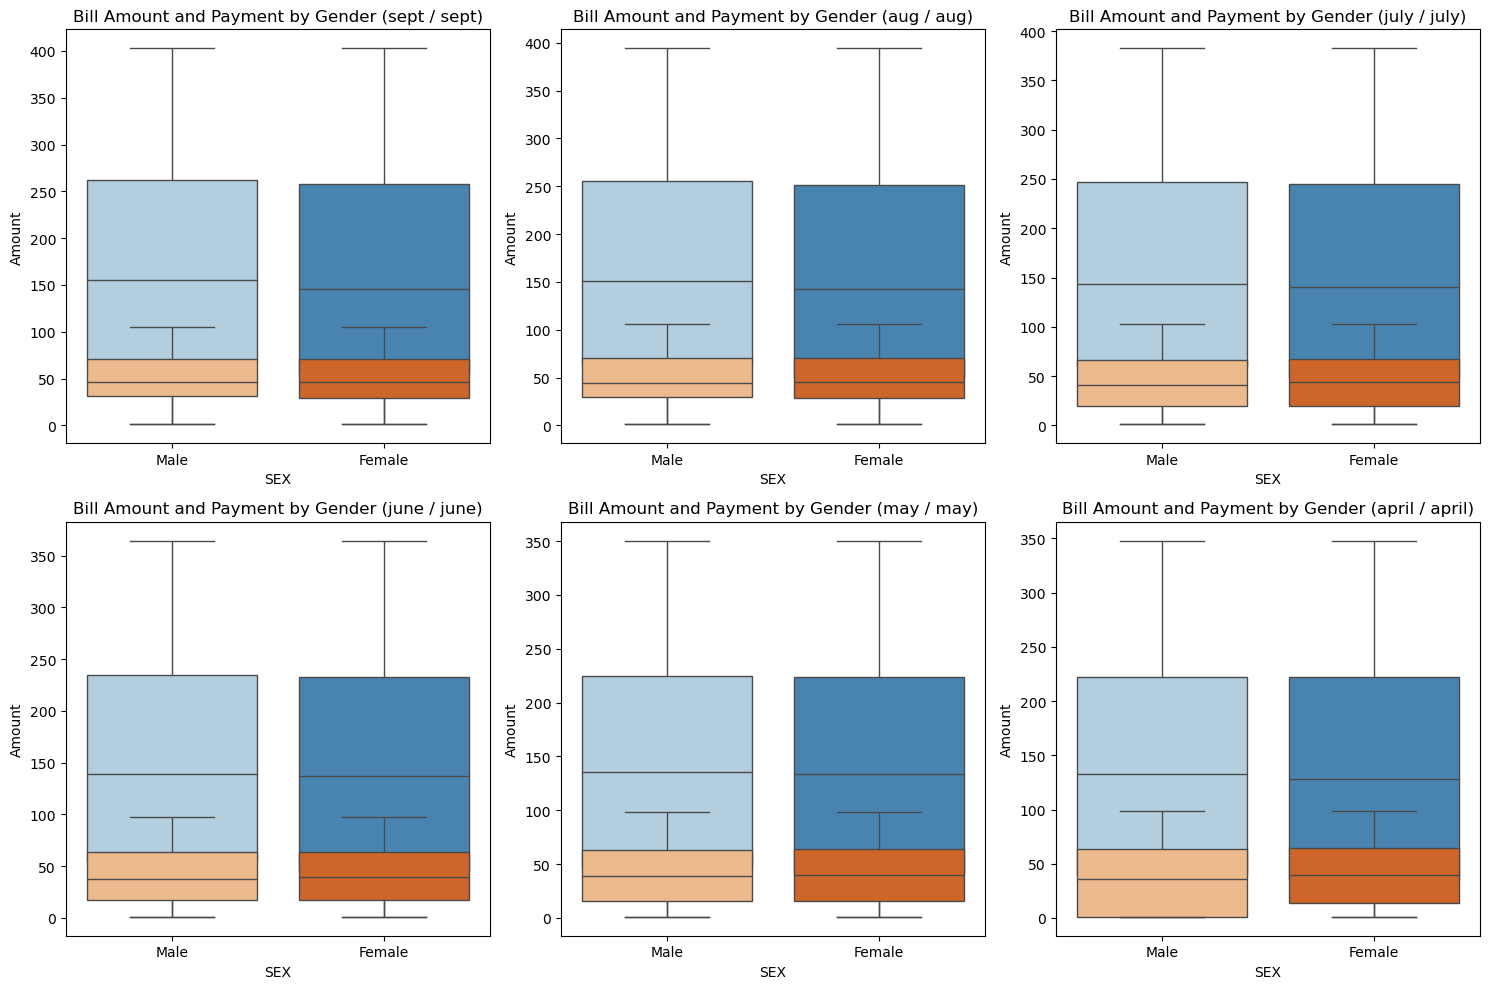

In [249]:

# Set up the figure
plt.figure(figsize=(15, 10))

# Loop through each bill and payment column
for i, (bill_col, pay_col) in enumerate(zip(bill_columns, pay_columns)):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns for 6 plots

    # Plot bill amount vs. payment for each gender
    sns.boxplot(data=df, x='SEX', y=bill_col, palette='Blues', showfliers=False)
    sns.boxplot(data=df, x='SEX', y=pay_col, palette='Oranges', showfliers=False)
    
    # Set title and labels
    plt.title(f'Bill Amount and Payment by Gender ({bill_col.split("_")[0]} / {pay_col.split("_")[0]})')
    plt.xticks([0, 1], ['Male', 'Female'])
    plt.ylabel('Amount')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [79]:
#Plotting Average bill amount vs payment with respect to gender

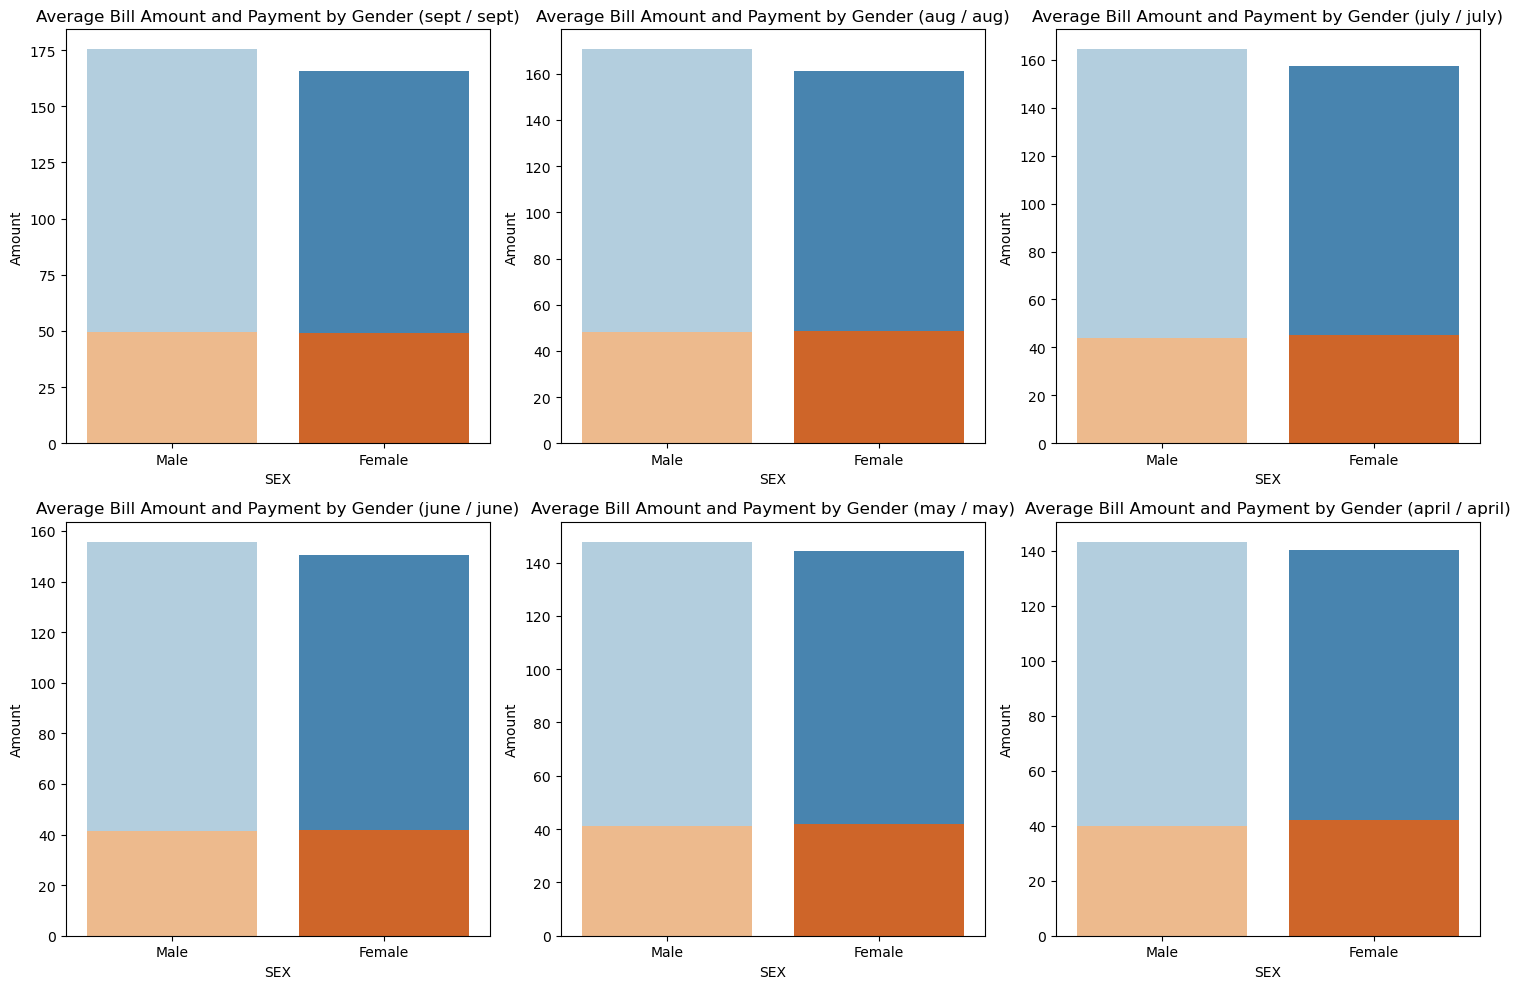

In [80]:
plt.figure(figsize=(15, 10))

for i, (bill_col, pay_col) in enumerate(zip(bill_columns, pay_columns)):
    plt.subplot(2, 3, i + 1)

    # Plot average bill amount for each gender
    sns.barplot(x='SEX', y=bill_col, data=df, palette='Blues', ci=None)
    
    # Plot average payment amount for each gender
    sns.barplot(x='SEX', y=pay_col, data=df, palette='Oranges', ci=None)

    plt.title(f'Average Bill Amount and Payment by Gender ({bill_col.split("_")[0]} / {pay_col.split("_")[0]})')
    plt.xticks([0, 1], ['Male', 'Female'])
    plt.ylabel('Amount')

plt.tight_layout()
plt.show()

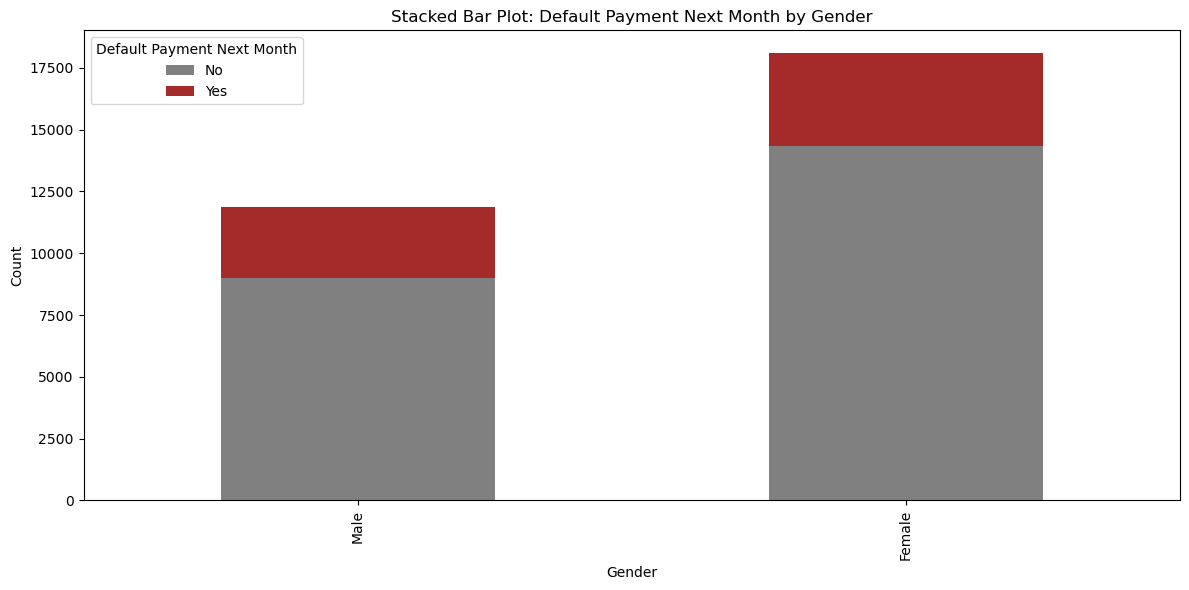

In [81]:
# Group by sex and default payment next month, then get the count of each combination
gender_target_count = df.groupby(['SEX', 'default payment next month']).size().unstack()

# Plot the stacked bar plot
gender_target_count.plot(kind='bar', stacked=True, figsize=(12, 6), color=['grey', 'brown'])

plt.title('Stacked Bar Plot: Default Payment Next Month by Gender')
plt.xticks([0, 1], ['Male', 'Female'])  
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Default Payment Next Month', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [82]:
# Count plot to show the number of people who defaulted the payment with respect to gender

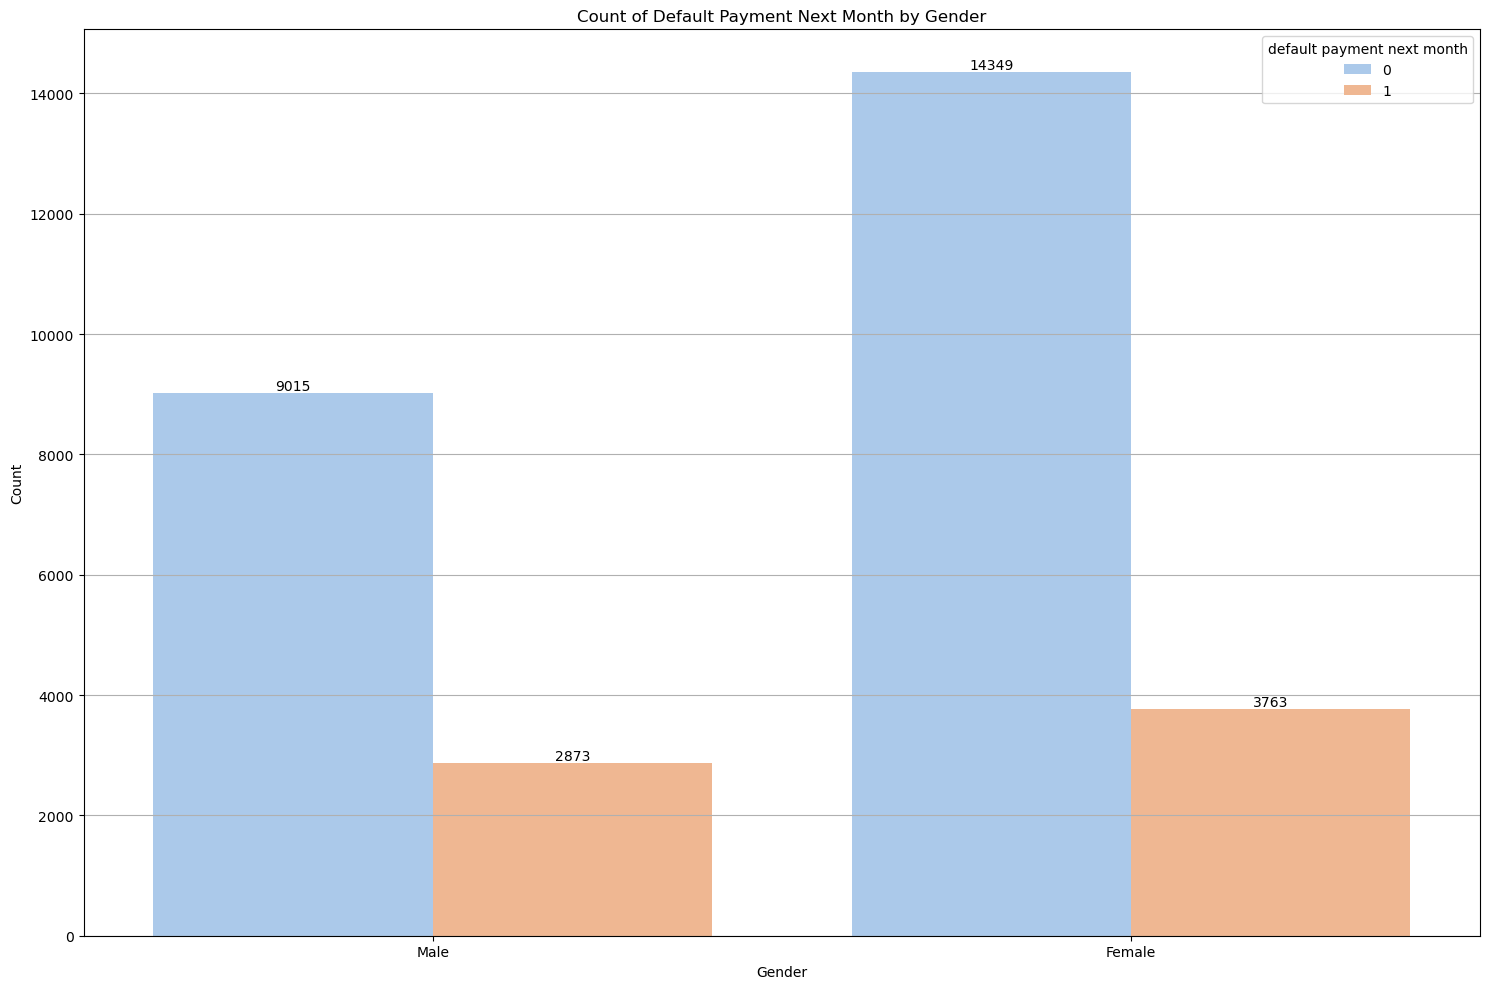

In [245]:
plt.figure(figsize=(15, 10))

# Count plot for default payment next month with respect to gender
sns.countplot(data=df, x='SEX', hue='default payment next month', palette='pastel')

plt.title('Count of Default Payment Next Month by Gender')
plt.xticks([0, 1], ['Male', 'Female'])  # Label x-axis as Male and Female
plt.xlabel('Gender')
plt.ylabel('Count')

# Add counts to the bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge')  # Display counts as integers

# Grid lines only for y-axis
plt.grid(axis='y')

plt.tight_layout()
plt.show()


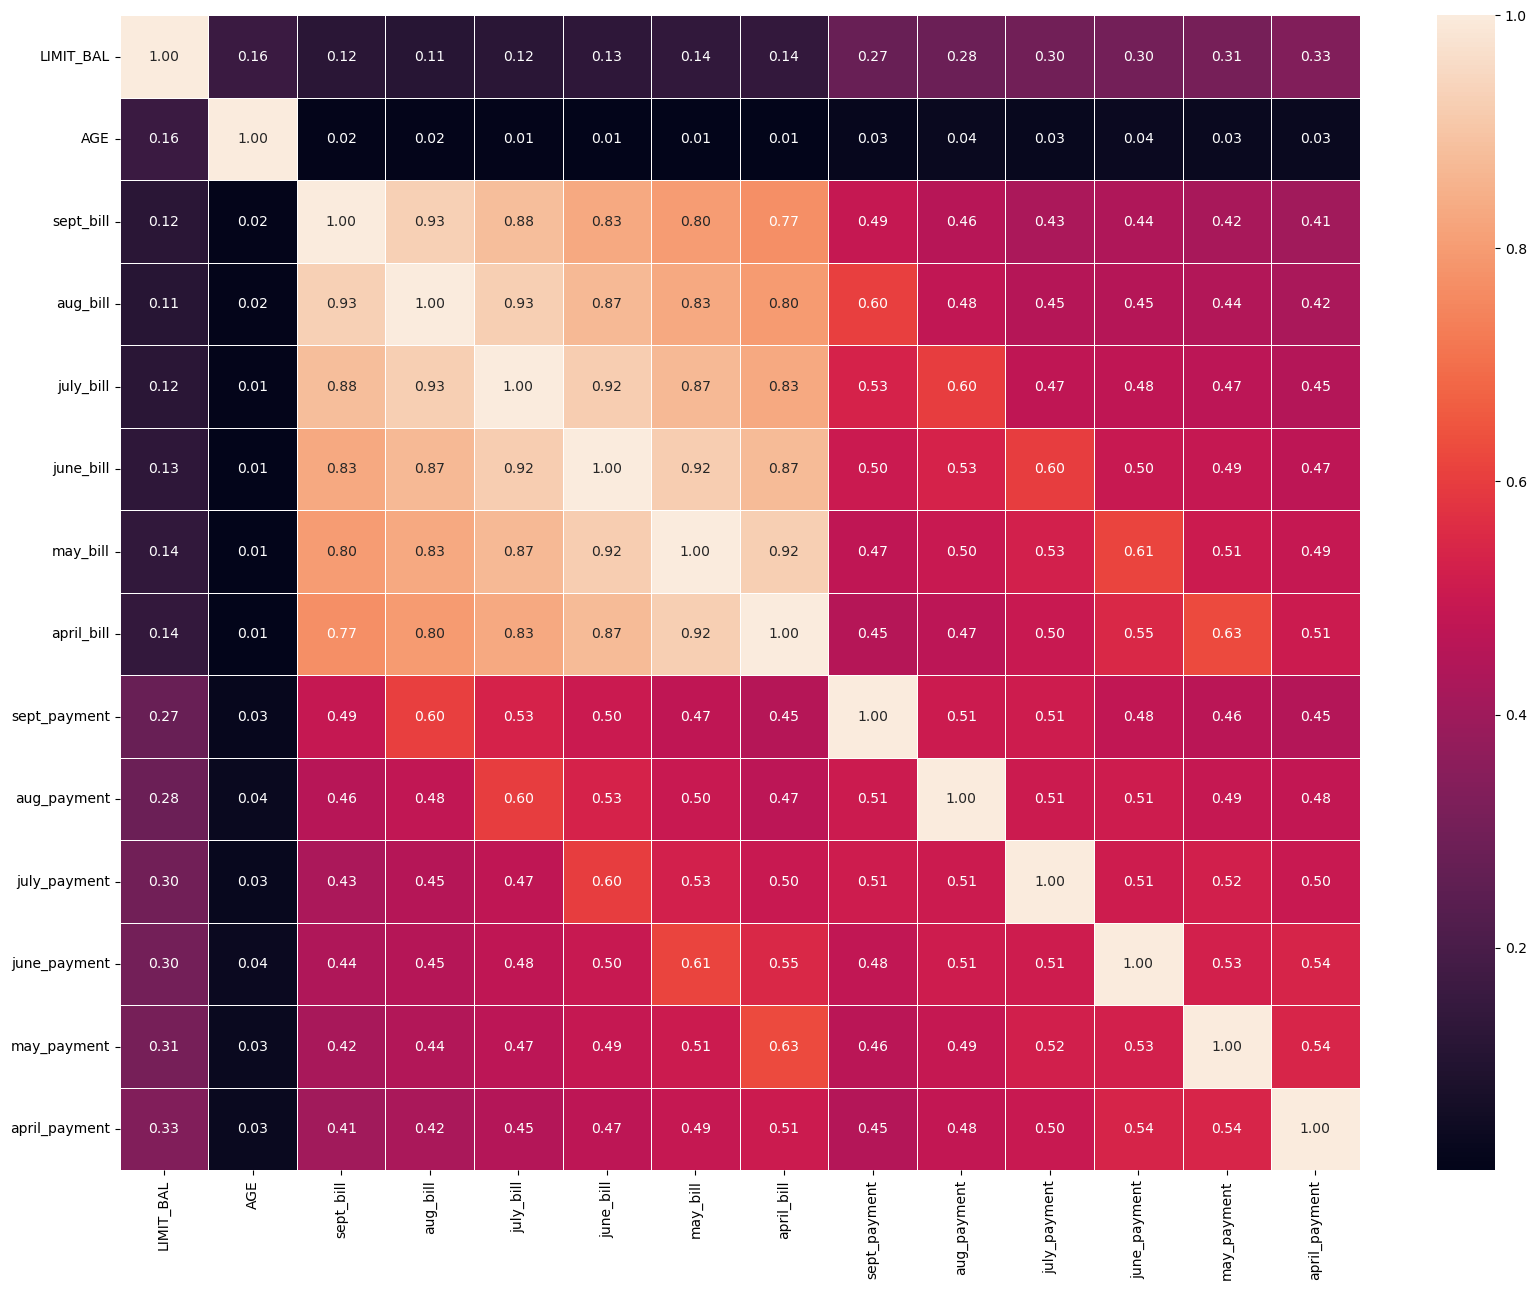

In [86]:
# Heatmap to show correlation

plt.figure(figsize=(20, 15))  # Adjust the figure size as needed
sns.heatmap(df[continues_num_col].corr(), annot=True, fmt=".2f", linewidths=0.5)

# Display the heatmap
plt.show()

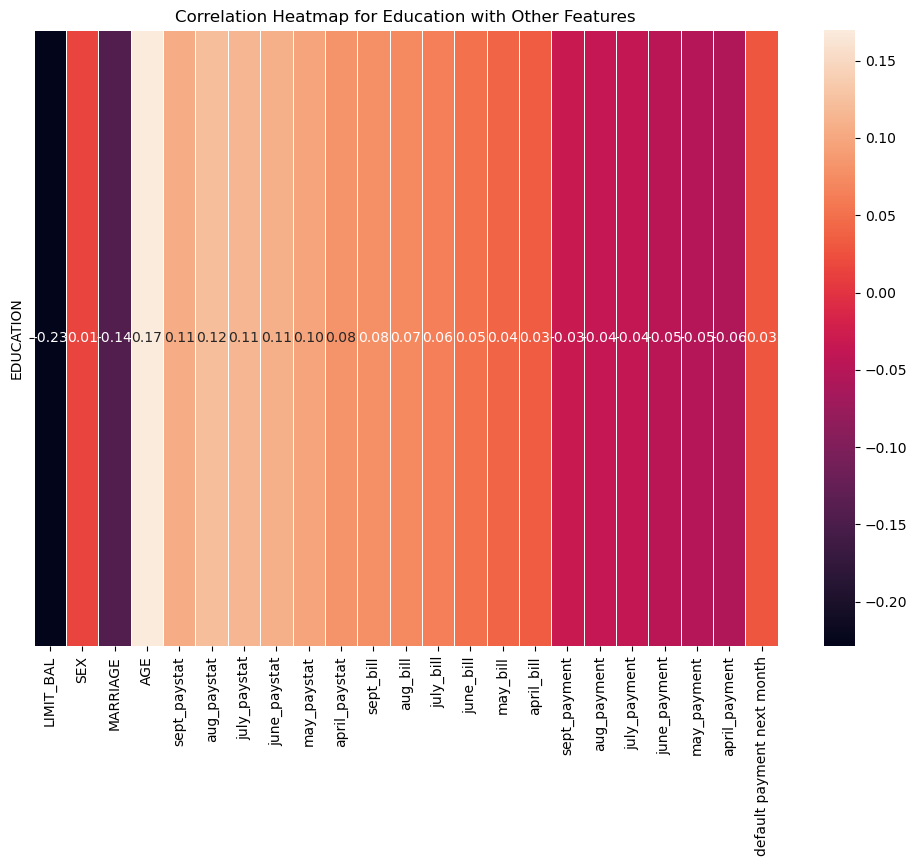

In [87]:
# Calculate correlation of 'education' column with all other numerical columns
correlation_education = df.corr()['EDUCATION'].drop('EDUCATION')  # Drop 'education' to avoid self-correlation

# Convert the correlation series to a DataFrame for heatmap plotting
correlation_education = correlation_education.to_frame()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_education.T, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Education with Other Features")
plt.show()

In [88]:
# Pie chart to show the amount of bill in each month

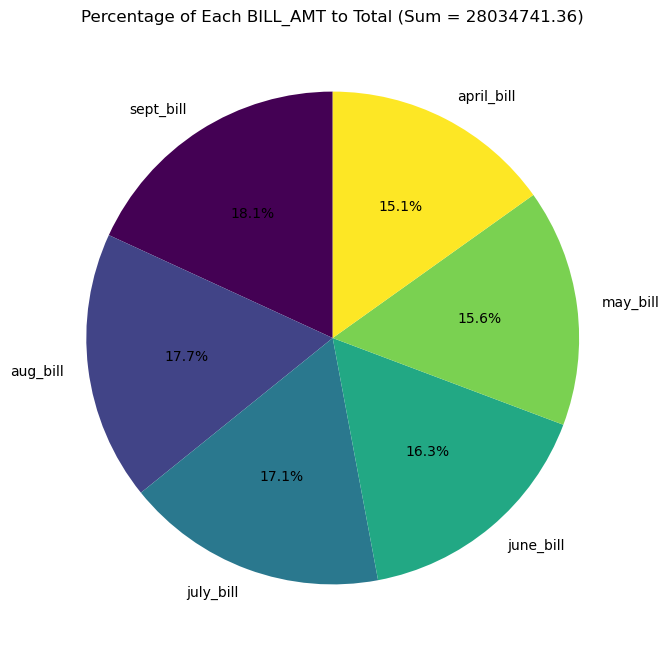

In [89]:


# Calculate the sum of each BILL_AMT column
bill_amt_sums = df[bill_columns].sum()

# Calculate the total sum of all BILL_AMT columns
total_bill_amt = bill_amt_sums.sum()

# Create a color map using the 'viridis' colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(bill_amt_sums)))

# Plotting the pie chart with Viridis color map
plt.figure(figsize=(8, 8))
plt.pie(bill_amt_sums, labels=bill_amt_sums.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f"Percentage of Each BILL_AMT to Total (Sum = {total_bill_amt:.2f})")
plt.show()

### Feature Selection

In [91]:
#Assigning data as X and Y

X = df.drop(columns=['default payment next month'])  
y = df['default payment next month']  # Target variable

In [92]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [93]:
# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X.columns,
                                   columns=["importance"]).sort_values("importance", ascending=False)

# Display the most important features
print(feature_importances)

               importance
sept_paystat     0.101703
AGE              0.071053
LIMIT_BAL        0.064371
sept_bill        0.059987
aug_bill         0.052745
sept_payment     0.051139
july_bill        0.049078
june_bill        0.048182
aug_payment      0.048103
april_bill       0.047881
may_bill         0.047392
april_payment    0.046052
july_payment     0.045623
june_payment     0.043927
may_payment      0.042942
aug_paystat      0.041006
july_paystat     0.024954
april_paystat    0.022091
june_paystat     0.022075
EDUCATION        0.021293
may_paystat      0.020481
MARRIAGE         0.014703
SEX              0.013221


In [94]:
# Select top 12 features
top_n_features = feature_importances.head(12).index
print(f"Top 12 features: {top_n_features}")

Top 10 features: Index(['sept_paystat', 'AGE', 'LIMIT_BAL', 'sept_bill', 'aug_bill',
       'sept_payment', 'july_bill', 'june_bill', 'aug_payment', 'april_bill',
       'may_bill', 'april_payment'],
      dtype='object')


### Split Data into Training and Testing Sets:

In [96]:
# Assign X using selected features
top_n_features = feature_importances.head(12).index  # Top 12 features
X_selected = X[top_n_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Display the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (24000, 12)
X_test shape: (6000, 12)
y_train shape: (24000,)
y_test shape: (6000,)


### Scaling Using Standard scaler

In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Display shapes to confirm
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (24000, 12)
X_test_scaled shape: (6000, 12)


### Model Building

In [100]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "k-NN": KNeighborsClassifier()
}


### Evaluation

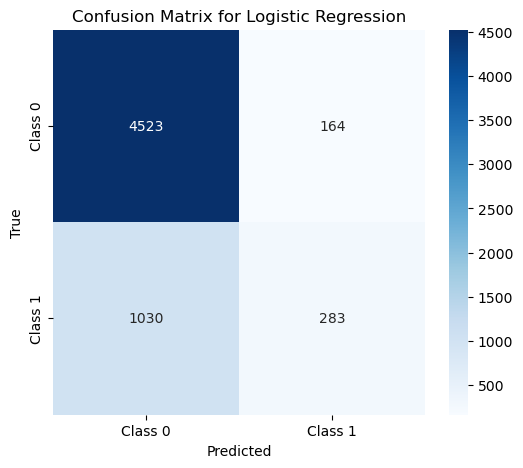

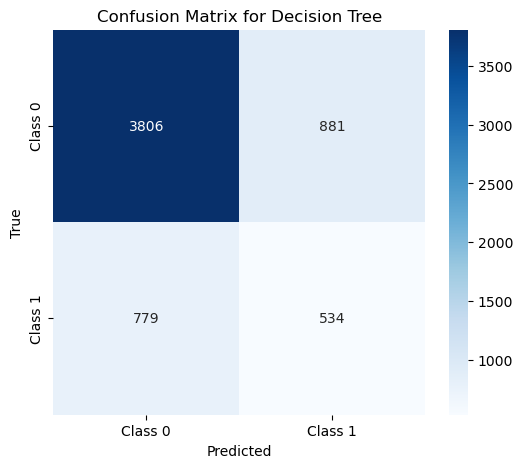

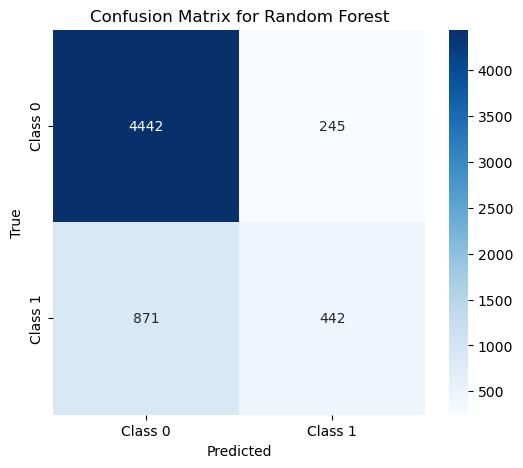

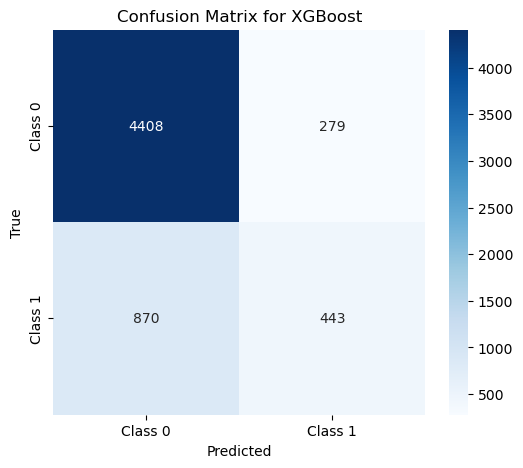

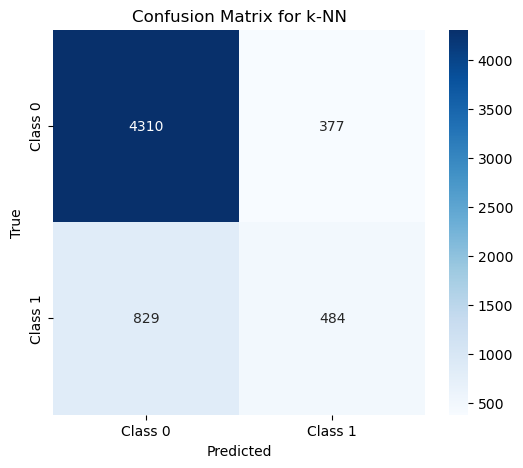


Logistic Regression:
Accuracy: 0.8010
Confusion Matrix:
[[4523  164]
 [1030  283]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4687
           1       0.63      0.22      0.32      1313

    accuracy                           0.80      6000
   macro avg       0.72      0.59      0.60      6000
weighted avg       0.77      0.80      0.76      6000


Decision Tree:
Accuracy: 0.7233
Confusion Matrix:
[[3806  881]
 [ 779  534]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.41      0.39      1313

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000


Random Forest:
Accuracy: 0.8140
Confusion Matrix:
[[4442  245]
 [ 871  442]]
Classification Report:
              precision    recall  f1

In [102]:
results = {}

# Train, evaluate, and store results for each model
for model_name, model in models.items():
    # Training the model
    model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test_scaled)
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Classification Report
    cr = classification_report(y_test, y_pred)
    
    # Storing results in the dictionary
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": cr
    }

    
     # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Printing results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")

In [103]:
# Print results
print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']:.4f}")


Model Performance:
Logistic Regression: Accuracy = 0.8010
Decision Tree: Accuracy = 0.7233
Random Forest: Accuracy = 0.8140
XGBoost: Accuracy = 0.8085
k-NN: Accuracy = 0.7990


**Best Model**

In [105]:

best_model_name = max(results, key=lambda model: results[model]['Accuracy'])
best_model_accuracy = results[best_model_name]['Accuracy']

print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}")


The best model is Random Forest with an accuracy of 0.8140


### Hyperparameter Tuning

In [107]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

In [108]:
model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters found by GridSearchCV:", best_params)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters found by GridSearchCV: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


**Evaluation after Hyperparameter Tuning**

In [237]:
# Predicting the target variable
y_pred = best_model.predict(X_test_scaled)

# Print Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.8202
Confusion Matrix:
[[4489  198]
 [ 881  432]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4687
           1       0.69      0.33      0.44      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000

ROC AUC: 0.7686


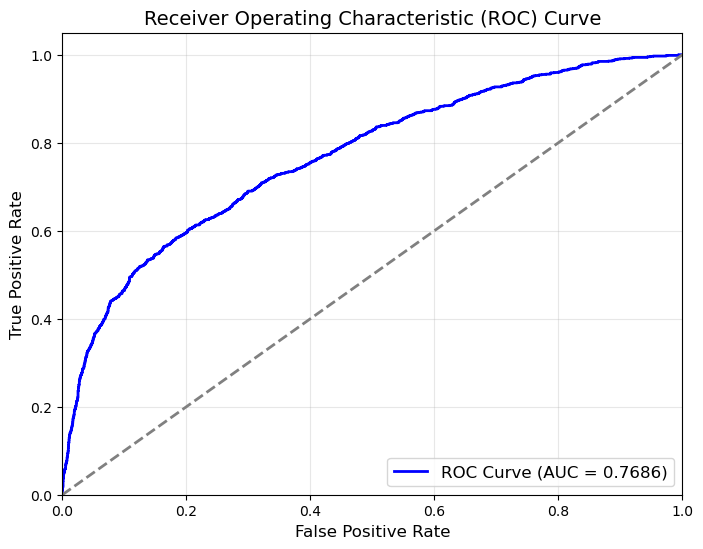

In [179]:
# Get the predicted probabilities for the positive class
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

**Creating Pipeline**

In [182]:
# Create the pipeline with SimpleImputer, StandardScaler, and the best model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values by replacing with median
    ('scaler', StandardScaler()),                  # Feature scaling
    ('classifier', RandomForestClassifier(
        n_estimators=200,                          # Best number of estimators from GridSearchCV
        min_samples_split=10,                       # Best min_samples_split from GridSearchCV
        min_samples_leaf=1,                         # Best min_samples_leaf from GridSearchCV
        max_depth=10,                               # Best max_depth from GridSearchCV
        class_weight=None,                          # Best class_weight from GridSearchCV
        random_state=42                             # Ensure reproducibility
    ))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_split=10,
                                        n_estimators=200, random_state=42))])

**Saving pipeline**

In [184]:
# Save the fitted pipeline to a file
joblib.dump(pipeline, 'best_model_pipeline_main.pkl')

['best_model_pipeline_main.pkl']

### Testing with unseen Data

**Load the Pipeline**

In [188]:
loaded_pipeline = joblib.load('best_model_pipeline_main.pkl') #the above saved pipeline have been loaded

**Loading Unseen Data**

In [191]:
# This unseen data have 1000 rows , cropped from the main data set

In [193]:
df_unseen = pd.read_csv('unseen_data_rf(1000).csv')
df_unseen

,sept_paystat,AGE,LIMIT_BAL,sept_bill,aug_bill,sept_payment,july_bill,june_bill,aug_payment,april_bill,may_bill,april_payment,y_actual
0,2,24,20000,3913,3102,0,689,0,689,0,0,0,1
1,-1,26,120000,2682,1725,0,2682,3272,1000,3261,3455,2000,1
2,0,34,90000,29239,14027,1518,13559,14331,1500,15549,14948,5000,0
3,0,37,50000,46990,48233,2000,49291,28314,2019,29547,28959,1000,0
4,-1,57,50000,8617,5670,2000,35835,20940,36681,19131,19146,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2,39,200000,-200,-200,0,-200,0,0,0,60800,0,0
996,0,45,140000,39716,40799,1600,41853,44452,1600,46383,45433,1495,0
997,1,38,360000,0,0,0,0,0,0,0,0,0,1
998,-1,23,50000,780,0,0,780,390,780,500,390,18300,1


**Splitting X and Y**

In [196]:
# Splitting x and y so that x can be used for prediction and y can used for comparing predicted values

In [198]:
X_unseen = df_unseen.drop('y_actual', axis=1)  # Drop the target column
y_actual = df_unseen['y_actual']  # The true target labels

**Predicting with Unseen Data**

In [201]:
y_unseen_pred = loaded_pipeline.predict(X_unseen) # Predicted y values using pipeline


**Adding predicted value to my unseen data**

In [204]:
df_unseen['y Predicted'] = y_unseen_pred # additional column to unseen data has been created for predicted value

**Displaying predicted value and original value**

In [207]:
df_unseen.head(25) #Displaying predicted values with actualvalues in dataframe

,sept_paystat,AGE,LIMIT_BAL,sept_bill,aug_bill,sept_payment,july_bill,june_bill,aug_payment,april_bill,may_bill,april_payment,y_actual,y Predicted
0,2,24,20000,3913,3102,0,689,0,689,0,0,0,1,1
1,-1,26,120000,2682,1725,0,2682,3272,1000,3261,3455,2000,1,0
2,0,34,90000,29239,14027,1518,13559,14331,1500,15549,14948,5000,0,0
3,0,37,50000,46990,48233,2000,49291,28314,2019,29547,28959,1000,0,0
4,-1,57,50000,8617,5670,2000,35835,20940,36681,19131,19146,679,0,0
5,0,37,50000,64400,57069,2500,57608,19394,1815,20024,19619,800,0,0
6,0,29,500000,367965,412023,55000,445007,542653,40000,473944,483003,13770,0,0
7,0,23,100000,11876,380,380,601,221,601,567,-159,1542,0,0
8,0,28,140000,11285,14096,3329,12108,12211,0,3719,11793,1000,0,0
9,-2,35,20000,0,0,0,0,0,0,13912,13007,0,0,0


**Save the updated DataFrame to a CSV file**


In [210]:
df_unseen.to_csv('unseen_data_with_predictions.csv', index=False)

print("File saved as 'unseen_data_with_predictions.csv'") #Saving the new csv file with predicted value

File saved as 'unseen_data_with_predictions.csv'


**Evaluation with unseen data**

In [219]:
# Print accuracy
print("Accuracy on Unseen Data:", accuracy_score(y_actual, y_unseen_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_actual, y_unseen_pred))

# Print classification report
print("Classification Report:\n", classification_report(y_actual, y_unseen_pred))

y_unseen_prob = best_model.predict_proba(X_unseen)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_actual, y_unseen_prob)
print(f"ROC AUC: {roc_auc:.4f}")



Accuracy on Unseen Data: 0.809
Confusion Matrix:
 [[730  56]
 [135  79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       786
           1       0.59      0.37      0.45       214

    accuracy                           0.81      1000
   macro avg       0.71      0.65      0.67      1000
weighted avg       0.79      0.81      0.79      1000

ROC AUC: 0.7125


## Conclusion

**Model Performance**

* Logistic Regression, Decision Tree, Random Forest, XGBoost, and k-NN were evaluated for predicting the likelihood of default payment next month. Among these, the Random Forest model outperformed the others, achieving an accuracy of 81.40%. This was followed by XGBoost with an accuracy of 80.85%, and Logistic Regression with 80.10%. k-NN (79.90%) and Decision Tree (72.33%) performed relatively worse.

* After performing hyperparameter tuning on Random Forest, the accuracy improved to 82.02%, showing that fine-tuning the model helped achieve better predictive power. The ROC AUC score for the tuned Random Forest model was 0.7686, which indicates a moderate ability to distinguish between the default and non-default classes

* The classification report for Random Forest showed a precision of 0.84 for the non-default class (class 0), but the recall for the default class (class 1) was low, at 0.33, indicating that the model struggles to identify true positives for defaults.

**Testing with unseen data**

* The model was tested on unseen data, achieving an accuracy of 80.90%. The confusion matrix showed that while the model had a high precision for predicting class 0 (non-default), the recall for class 1 (default) remained low. This pattern indicates that the model might be biased towards predicting the majority class (non-default), a common issue with imbalanced datasets.


**Limitations of Dataset**

The imbalanced dataset (with 0s outnumbering 1s) posed a challenge for the model, as evidenced by the lower recall for the minority class (defaults). Despite the high accuracy, the model’s ability to correctly identify defaults is limited. Techniques such as oversampling the minority class, undersampling the majority class, or adjusting the class weights during model training could potentially improve recall for class 1.

**The Random Forest model, especially after hyperparameter tuning, provides a strong predictor for whether a customer will default on a payment next month. However, challenges remain due to the imbalanced nature of the dataset, which limits the model’s recall for predicting defaults. Future work could involve addressing class imbalance through resampling techniques or using ensemble methods that are more sensitive to the minority class. Further fine-tuning and feature engineering might also help improve the model’s overall performance.**



## Future Work

**Address Imbalanced Data Through Resampling Techniques:** As the dataset is imbalanced, further work can be done to tackle this issue. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) or undersampling could help balance the dataset, allowing the model to better identify defaults without biasing towards the majority class

**Explore Deep Learning Algorithms:** While the current model performs well, there is potential for further improvement using deep learning techniques. Neural networks, such as fully connected deep networks or LSTM (Long Short-Term Memory) models, could be explored to capture more complex patterns in the data. These models are particularly effective when dealing with large datasets and can potentially lead to higher accuracy.

**Update the Model Periodically with New Data:** The model's performance might degrade over time as customer behavior and other factors evolve. Therefore, it would be beneficial to periodically retrain the model with new data to maintain its accuracy and relevance. This will help the model stay up to date and reflect current trends in payment defaults.

**Consider Adding More Features to Enhance Predictive Power:** While the current set of features is useful, additional features could potentially enhance the model’s predictive power. Exploring external datasets or feature engineering techniques like adding interaction terms, aggregated features, or temporal features (e.g., customer behavior over time) could provide valuable insights and improve the model's accuracy.